# <a id='1'>1. Introduction</a>
In this project, I am investigating the dataset containing information on population, region, area size, mortality and more of 227 countries. I will be focusing on the factors that affecting a country's GDP per capita and try to make a model using the data of 227 countries from the dataset.

# <a id='2'>2. Load Libraries</a>

In [ ]:
import numpy as np # for linear algebra
import pandas as pd # for data processing
from matplotlib import pyplot as plt # data plots
import seaborn as sns #  data plots
sns.set()

from sklearn.preprocessing import LabelEncoder # for label normalization
from sklearn.model_selection import train_test_split # for splitting data into train and test subsets
from sklearn.linear_model import LinearRegression # for using Linear Regression model
from sklearn.metrics import mean_squared_error, mean_squared_log_error


In [ ]:
data = pd.read_csv('/content/countries of the world.csv',decimal=',')
print('Number of missing data:')
print(data.isnull().sum())
data.describe(include='all')

Number of missing data:
Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,227,227,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
unique,227,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,SUB-SAHARAN AFRICA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,NaN,NaN,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,NaN,NaN,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,NaN,NaN,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,NaN,NaN,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,NaN,NaN,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500


In [ ]:
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [ ]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service'],
      dtype='object')

# <a id='4'>4. Data Preparation</a>
I noticed that there are some missing data in the table. For simplicity, I will just fill the missing data using the median of the region that a country belongs, as countries that are close geologically are often similar in many ways. For example, lets check the region median of 'GDP ($ per capita)', 'Literacy (%)' and 'Agriculture'. Note that for 'climate' we use the mode instead of median as it seems that 'climate' is a categorical feature here.

In [ ]:
data.groupby('Region')[['GDP ($ per capita)','Literacy (%)','Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


In [ ]:
# Fill up missing values
for col in data.columns.values:
    if data[col].isnull().sum() == 0:
        continue
    if col == 'Climate':
        guess_values = data.groupby('Region')['Climate'].apply(lambda x: x.mode().max())
    else:
        guess_values = data.groupby('Region')[col].median()
    for region in data['Region'].unique():
        data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]

<ipython-input-6-558d6ff8cd47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
<ipython-input-6-558d6ff8cd47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isnull())&(data['Region']==region)] = guess_values[region]
<ipython-input-6-558d6ff8cd47>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col].loc[(data[col].isn

# <a id='5'>5. Data Exploration</a>

<a id='5-1'>5.1 Top Countries With Highest GDP</a>

Look at the top 20 countries with highest GDP per capita. Luxembourg is quite ahead, the next 19 countries are close to each other. Germany, the 20th has about 2.5 times GDP per capita of the world average.

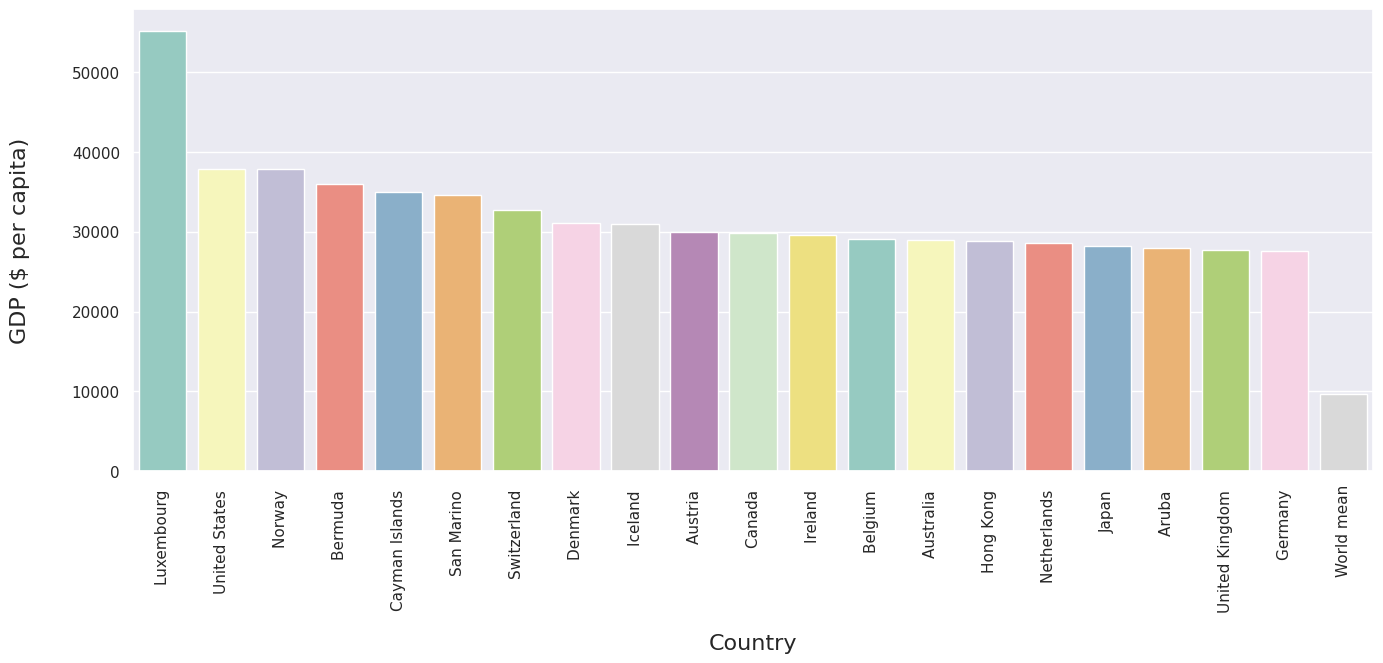

In [ ]:
fig, ax = plt.subplots(figsize=(16,6))
#ax = fig.add_subplot(111)
top_gdp_countries = data.sort_values('GDP ($ per capita)',ascending=False).head(20)
mean = pd.DataFrame({'Country':['World mean'], 'GDP ($ per capita)':[data['GDP ($ per capita)'].mean()]})
gdps = pd.concat([top_gdp_countries[['Country','GDP ($ per capita)']],mean],ignore_index=True)

sns.barplot(x='Country',y='GDP ($ per capita)',data=gdps, palette='Set3')
ax.set_xlabel(ax.get_xlabel(),labelpad=15)
ax.set_ylabel(ax.get_ylabel(),labelpad=30)
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)
plt.xticks(rotation=90)
plt.show()

The graph shows the top 20 countries with the highest GDP per capita, as well as the world mean GDP per capita. Here are a few insights we can gather from this graph:

- Luxembourg has a significantly higher GDP per capita compared to the rest of the countries in the top 20, indicating a strong and prosperous economy.

- The remaining 19 countries have relatively similar GDP per capita values, suggesting that their economies are relatively close in size and strength.

- Germany, the 20th country on the list, still has a relatively high GDP per capita compared to the world mean, indicating that it is a prosperous country.

It is also worth noting that there is a significant gap between the GDP per capita of the top 20 countries and the world mean, indicating that there are large disparities in economic prosperity across the world.

<a id='5-2'>5.2 Correlation between variables</a>

The heatmap shows the correlation between all numerical columns.

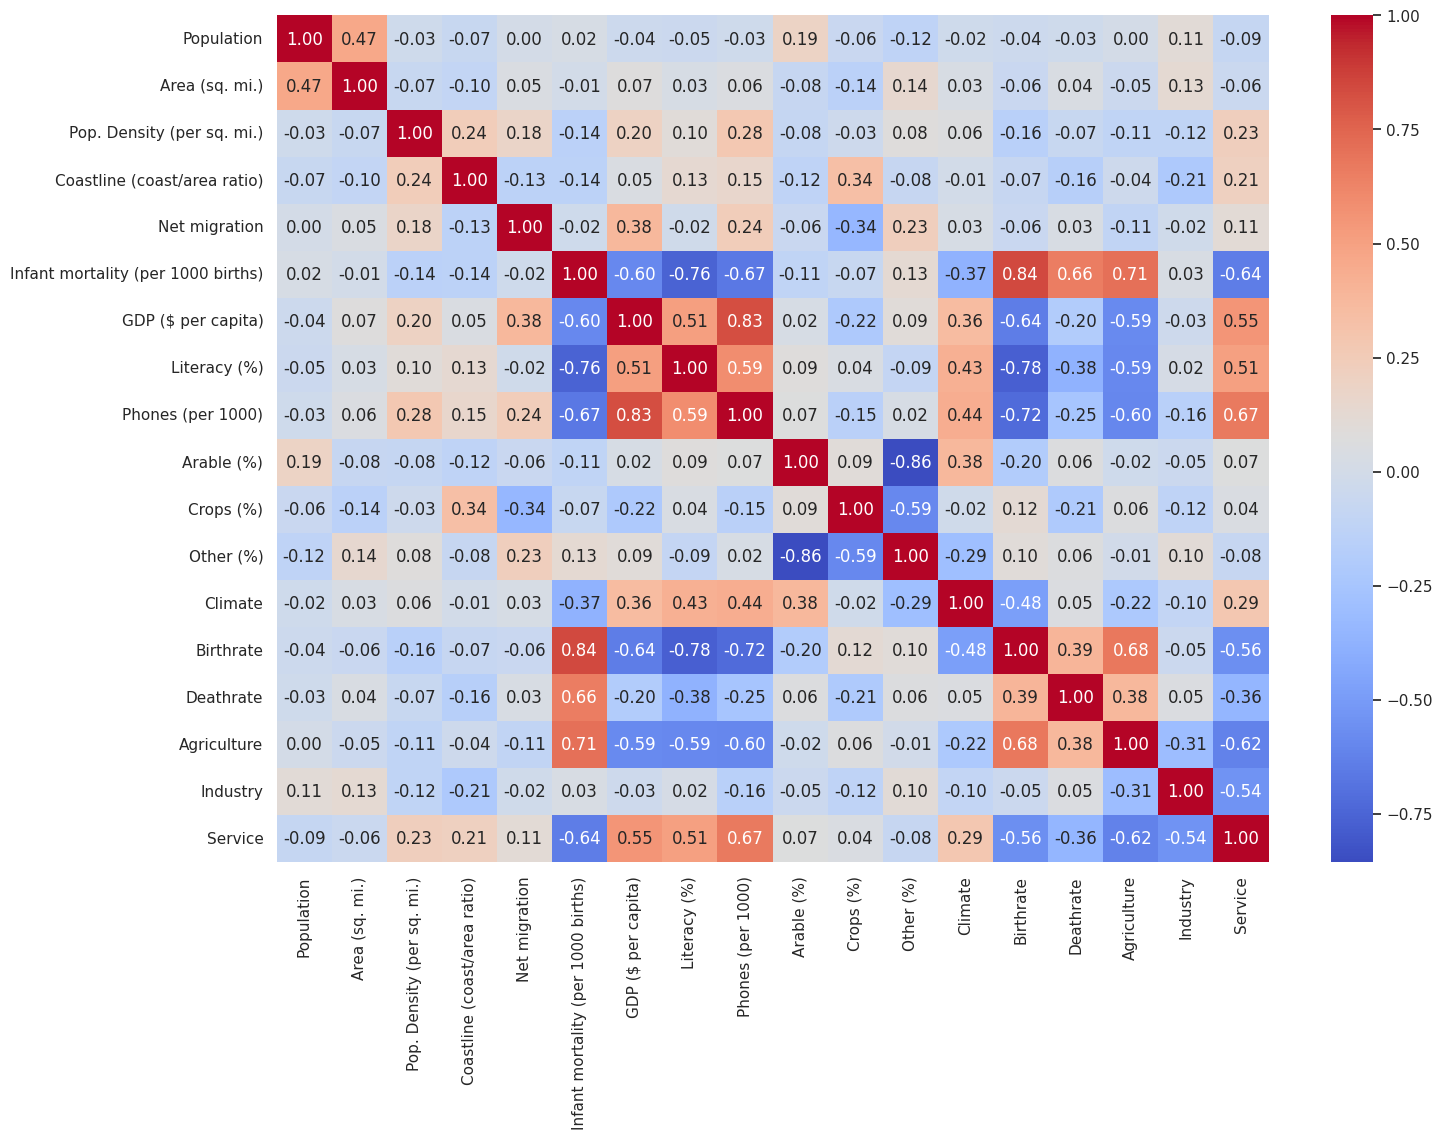

In [ ]:
plt.figure(figsize=(16,11))
sns.heatmap(data=data.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

Based on the heatmap, we can see that there are some strong positive correlations between certain pairs of variables. For example:


- GDP per capita is positively correlated with literacy rate (0.51), which suggests that countries with higher GDP per capita tend to have higher literacy rates.

-GDP per capita is positively correlated with phones (0.83), which suggests that countries with higher GDP per capita tend to have a higher density of phone lines per capita.

There are also some negative correlations between certain variables, such as:

 - GDP per capita is negatively correlated with infant mortality (-0.60), which suggests that countries with higher GDP per capita tend to have lower infant mortality rates.
 - GDP per capita is negatively correlated with birthrate (-0.64), which suggests that countries with higher GDP per capita tend to have lower birth rates.

<a id='5-2'>5.4 Top Factors Affecting GDP</a>

We pick the six columns that mostly correlated to GDP per capita and make scatter plots. The results agree with our common sense. Also we notice there are many countries with low average GDP and few with high average GDP ---- a pyramid structure.

<ipython-input-9-6c0fb2867ba9>:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


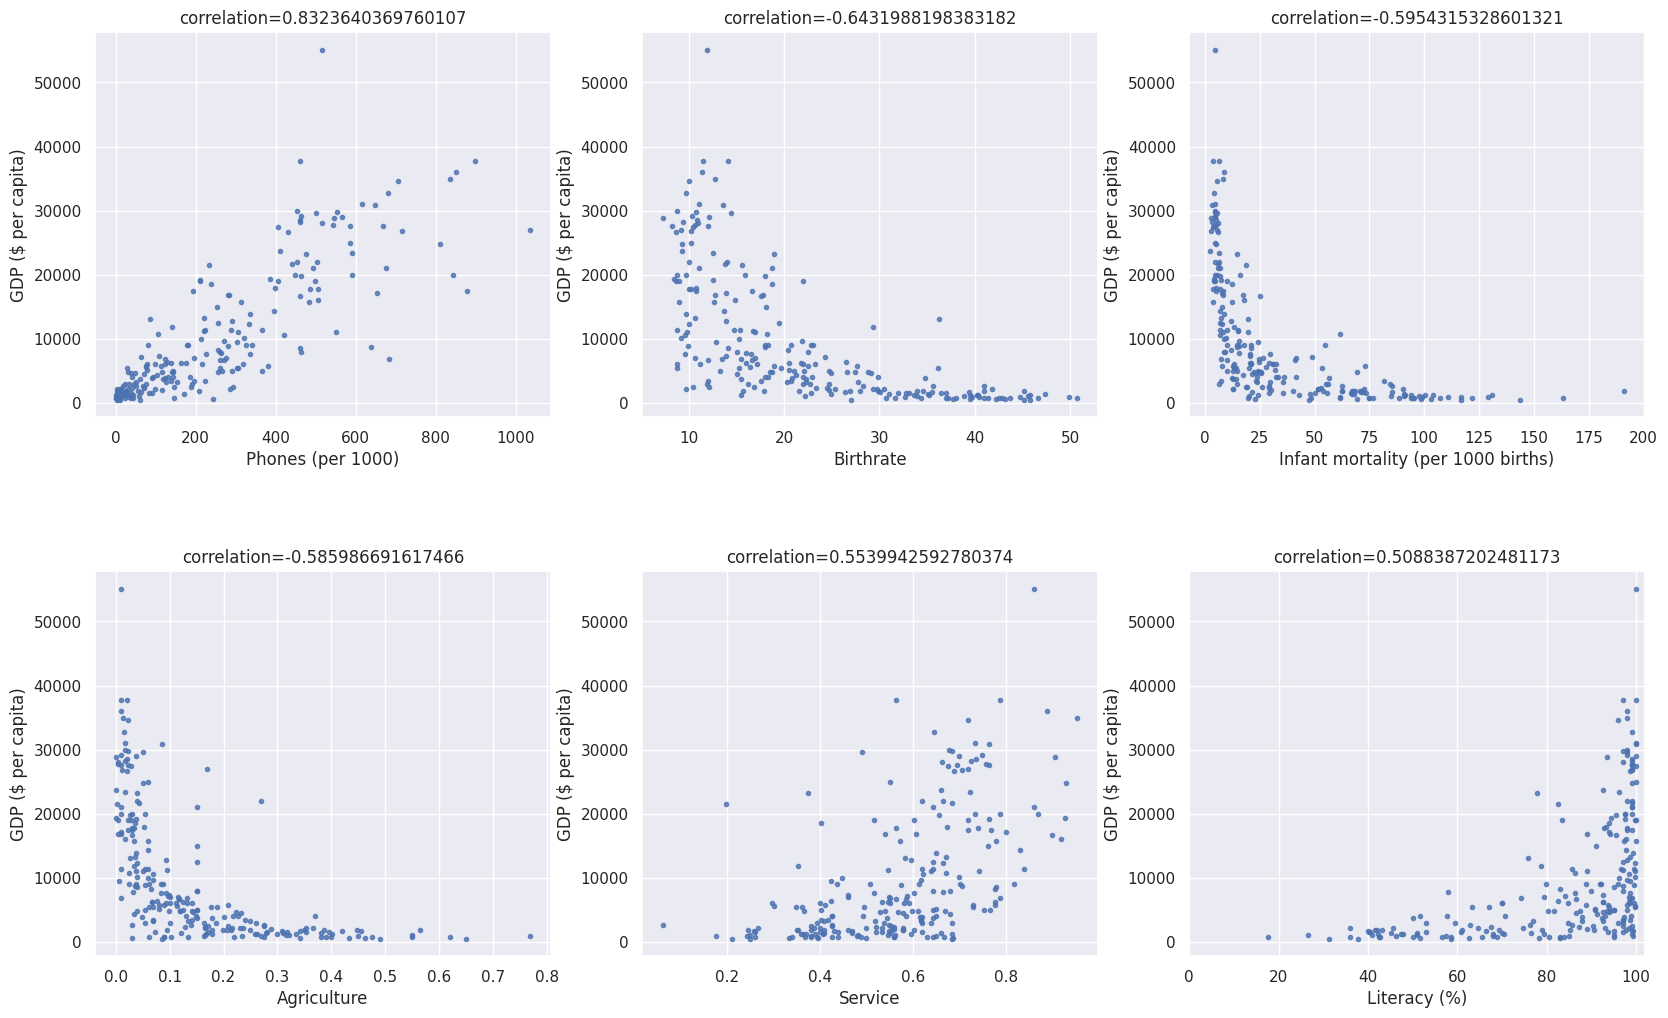

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = data['GDP ($ per capita)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=data,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

From the above scatter plots, we can observe that:

- There is a strong positive correlation between GDP per capita and Literacy percentage, indicating that a country's GDP per capita tends to be higher when its population is more literate.
- There is a negative correlation between GDP per capita and the percentage of population working in the Agriculture sector, which is expected since agriculture is typically associated with lower economic development.
-There is a positive correlation between GDP per capita and the percentage of population in the Service sector, which is expected since service sectors are typically associated with higher economic development.
-There is a weak correlation between GDP per capita and Birthrate and Deathrate, indicating that these variables do not have a significant impact on a country's GDP per capita.
-There is a moderate positive correlation between GDP per capita and the number of phones per thousand people, which suggests that there is a link between telecommunications infrastructure and economic development.
-There is a moderate negative correlation between GDP per capita and the Infant mortality rate, indicating that higher GDP per capita is associated with better infant mortality rates, which is an indication of better healthcare infrastructure.

<a id='5-5'> 5.5 Countries With Low Birthrate & Low GDP</a>

Some features, like phones, are related to the average GDP more linearly, while others are not. For example, High birthrate usually means low GDP per capita, but average GDP in low birthrate countries can vary a lot.

Let's look at the countries with low birthrate (<14%) and low GDP per capita (<10000 $). They also have hight literacy, like other high average GDP countires. But we hope their other features can help distiguish them from those with low birthrate but high average GDPs, like service are not quite an importent portion in their economy, not a lot phone procession, some have negative net migration... And many of them are from eastern Europe or C.W. of IND. STATES, so the 'region' feature may also be useful.

In [ ]:
data.loc[(data['Birthrate']<14)&(data['GDP ($ per capita)']<10000)]


,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591
25,Bosnia & Herzegovina,EASTERN EUROPE,4498976,51129,88.0,0.04,0.31,21.05,6100.0,98.6,215.4,13.60,2.96,83.44,4.0,8.77,8.27,0.142,0.308,0.550
30,Bulgaria,EASTERN EUROPE,7385367,110910,66.6,0.32,-4.58,20.55,7600.0,98.6,336.3,40.02,1.92,58.06,3.0,9.65,14.27,0.093,0.304,0.603
42,China,ASIA (EX. NEAR EAST),1313973713,9596960,136.9,0.15,-0.40,24.18,5000.0,90.9,266.7,15.40,1.25,83.35,1.5,13.25,6.97,0.125,0.473,0.403
51,Cuba,LATIN AMER. & CARIB,11382820,110860,102.7,3.37,-1.58,6.33,2900.0,97.0,74.7,33.05,7.60,59.35,2.0,11.89,7.22,0.055,0.261,0.684
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553
123,Macedonia,EASTERN EUROPE,2050554,25333,80.9,0.00,-1.45,10.09,6700.0,98.6,260.0,22.26,1.81,75.93,3.0,12.02,8.77,0.118,0.319,0.563
168,Romania,EASTERN EUROPE,22303552,237500,93.9,0.09,-0.13,26.43,7000.0,98.4,196.9,40.82,2.25,56.93,3.0,10.70,11.77,0.101,0.350,0.549
169,Russia,C.W. OF IND. STATES,142893540,17075200,8.4,0.22,1.02,15.39,8900.0,99.6,280.6,7.33,0.11,92.56,4.0,9.95,14.65,0.054,0.371,0.575


In [ ]:
len(data.loc[(data['Birthrate']<14)&(data['GDP ($ per capita)']<10000)])

16

Based on the selected criteria, we can infer that the 16 countries are likely to have lower economic development and lower birth rates. This may suggest that these countries have lower levels of industrialization, lower education levels, and fewer opportunities for employment, which could contribute to the lower birth rate.

The combination of low GDP per capita and low birth rate may also suggest a need for economic development and social policies to encourage family growth, such as increasing education levels, promoting gender equality, and providing better healthcare services.

Further analysis and comparison with other countries that have higher GDP per capita and birth rate may help identify potential factors contributing to the observed patterns.

# <a id='6'>6. Modeling</a>

<a id='6-1'> 6.1 Training & Testing </a>

First label encode the categorical features 'Region' and 'Climate', and I will just use all features given in the dataset without further feature engineering.

In [ ]:
LE = LabelEncoder()
data['Region_label'] = LE.fit_transform(data['Region'])
data['Climate_label'] = LE.fit_transform(data['Climate'])
data.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Region_label,Climate_label
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,...,0.22,87.65,1.0,46.60,20.34,0.3800,0.240,0.380,0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,...,4.42,74.49,3.0,15.11,5.22,0.2320,0.188,0.579,3,4
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,...,0.25,96.53,1.0,17.14,4.61,0.1010,0.600,0.298,6,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,...,15.00,75.00,2.0,22.46,3.27,0.1505,0.171,0.644,8,2
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,...,0.00,97.78,3.0,8.71,6.25,0.0220,0.245,0.720,10,4


In [ ]:
data.columns

Index(['Country', 'Region', 'Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)',
       'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate',
       'Agriculture', 'Industry', 'Service', 'Region_label', 'Climate_label'],
      dtype='object')

Taking only 2 feature for prediction


In [ ]:
new_data = ['Population','Area (sq. mi.)', 'GDP ($ per capita)','Literacy (%)','Phones (per 1000)']
new_df = data[new_data]

In [ ]:
new_df.to_csv('new_data.csv',index=False)

In [ ]:
import pandas as pd

In [ ]:
new_data = pd.read_csv('/content/new_data.csv')

In [ ]:
train, test = train_test_split(new_data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)','Literacy (%)','Phones (per 1000)']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

In [ ]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 5627.445622852698 msle_train: 1.0977009699605085
rmse_test: 5632.160713851858 msle_test: 1.8787930122385994


In [ ]:
import pickle

In [ ]:
# Save the trained model as model.pkl
with open('model3.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from google.colab import files

files.download('model3.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

the dataset data is split into training and testing subsets using the train_test_split function from the sklearn.model_selection module. The test_size parameter is set to 0.3, indicating that 30% of the data will be used for testing, while the remaining 70% will be used for training. The shuffle parameter is set to True, which means that the data will be shuffled before splitting.

The training_features list contains the names of the columns/features that will be used as input for training the model. These features include various socio-economic and demographic indicators such as population, area, density, migration, mortality, literacy, phones, arable land, crops, birth rate, death rate, sectoral contributions (agriculture, industry, service), region label, climate label, and service.

The target variable represents the column/feature that we want to predict, which is the GDP per capita.

The training data is then extracted from the train subset using the training_features list, and the corresponding target values are extracted as well. Similarly, the testing data is extracted from the test subset using the same set of features.

By splitting the data into training and testing subsets, we can use the training data to train our model and the testing data to evaluate its performance on unseen data.

In [ ]:
train, test = train_test_split(data, test_size=0.3, shuffle=True)
training_features = ['Population', 'Area (sq. mi.)',
       'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
       'Net migration', 'Infant mortality (per 1000 births)',
       'Literacy (%)', 'Phones (per 1000)',
       'Arable (%)', 'Crops (%)', 'Other (%)', 'Birthrate',
       'Deathrate', 'Agriculture', 'Industry', 'Service', 'Region_label',
       'Climate_label','Service']
target = 'GDP ($ per capita)'
train_X = train[training_features]
train_Y = train[target]
test_X = test[training_features]
test_Y = test[target]

I am using the linear regression model here. As for metric, I will check both root mean squared error and mean squared log error.

In [ ]:
model = LinearRegression()
model.fit(train_X, train_Y)
train_pred_Y = model.predict(train_X)
test_pred_Y = model.predict(test_X)
train_pred_Y = pd.Series(train_pred_Y.clip(0, train_pred_Y.max()), index=train_Y.index)
test_pred_Y = pd.Series(test_pred_Y.clip(0, test_pred_Y.max()), index=test_Y.index)

rmse_train = np.sqrt(mean_squared_error(train_pred_Y, train_Y))
msle_train = mean_squared_log_error(train_pred_Y, train_Y)
rmse_test = np.sqrt(mean_squared_error(test_pred_Y, test_Y))
msle_test = mean_squared_log_error(test_pred_Y, test_Y)

print('rmse_train:',rmse_train,'msle_train:',msle_train)
print('rmse_test:',rmse_test,'msle_test:',msle_test)

rmse_train: 4846.307874073756 msle_train: 5.432929327395525
rmse_test: 4845.504536738303 msle_test: 3.5820792070650116


In [ ]:
import pickle

In [ ]:

# Save the trained model as model.pkl
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
from google.colab import files

files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# <a id='7'>7. Total GDP</a>

<a id='7-1'>7.1 Top Countries</a>

It is also interesting to look at the total GDPs, which I take as 'GDP ($ per capita)' × 'Population'.

Here are the top 10 countries with highest total GDPs, their GDP make up to about 2/3 of the global GDP.

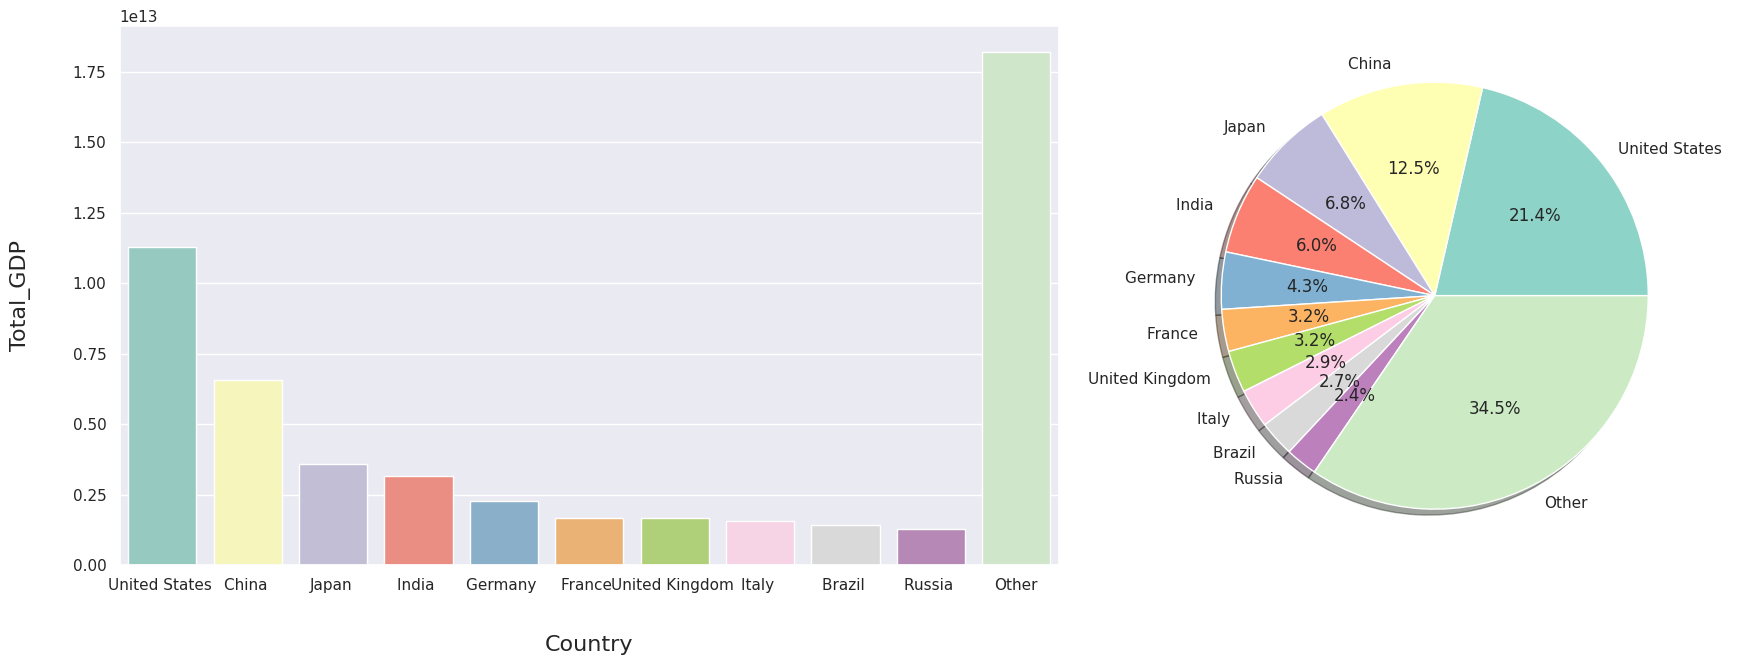

In [ ]:
data['Total_GDP ($)'] = data['GDP ($ per capita)'] * data['Population']
#plt.figure(figsize=(16,6))
top_gdp_countries = data.sort_values('Total_GDP ($)',ascending=False).head(10)
other = pd.DataFrame({'Country':['Other'], 'Total_GDP ($)':[data['Total_GDP ($)'].sum() - top_gdp_countries['Total_GDP ($)'].sum()]})
gdps = pd.concat([top_gdp_countries[['Country','Total_GDP ($)']],other],ignore_index=True)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,7),gridspec_kw = {'width_ratios':[2,1]})
sns.barplot(x='Country',y='Total_GDP ($)',data=gdps,ax=axes[0],palette='Set3')
axes[0].set_xlabel('Country',labelpad=30,fontsize=16)
axes[0].set_ylabel('Total_GDP',labelpad=30,fontsize=16)

colors = sns.color_palette("Set3", gdps.shape[0]).as_hex()
axes[1].pie(gdps['Total_GDP ($)'], labels=gdps['Country'],colors=colors,autopct='%1.1f%%',shadow=True)
axes[1].axis('equal')
plt.show()

Let's compare the above ten countries' rank in total GDP and GDP per capita.

In [ ]:
Rank1 = data[['Country','Total_GDP ($)']].sort_values('Total_GDP ($)', ascending=False).reset_index()
Rank2 = data[['Country','GDP ($ per capita)']].sort_values('GDP ($ per capita)', ascending=False).reset_index()
Rank1 = pd.Series(Rank1.index.values+1, index=Rank1.Country)
Rank2 = pd.Series(Rank2.index.values+1, index=Rank2.Country)
Rank_change = (Rank2-Rank1).sort_values(ascending=False)
print('rank of total GDP - rank of GDP per capita:')
Rank_change.loc[top_gdp_countries.Country]

rank of total GDP - rank of GDP per capita:


Country
United States        1
China              118
Japan               14
India              146
Germany             15
France              15
United Kingdom      12
Italy               17
Brazil              84
Russia              75
dtype: int64

We see the countries with high total GDPs are quite different from those with high average GDPs.

China and India jump above a lot when it comes to the total GDP.

The only country that is with in top 10 (in fact top 2) for both total and average GDPs is the United States.

<a id='7-2'>7.2 Factors Affecting Total GDP</a>

We can also check the correlation between total GDP and the other columns. The top two factors are population and area, following many factors that have also been found mostly correlated to GDP per capita.

In [ ]:
corr_to_gdp = pd.Series()
for col in data.columns.values[2:]:
    if ((col!='Total_GDP ($)')&(col!='Climate')&(col!='GDP ($ per capita)')):
        corr_to_gdp[col] = data['Total_GDP ($)'].corr(data[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]
print(corr_to_gdp)

Population                            0.639528
Area (sq. mi.)                        0.556396
Phones (per 1000)                     0.233484
Birthrate                            -0.166889
Agriculture                          -0.139516
Arable (%)                            0.129928
Climate_label                         0.125791
Infant mortality (per 1000 births)   -0.122076
Literacy (%)                          0.099417
Service                               0.085096
Region_label                         -0.079745
Crops (%)                            -0.077078
Coastline (coast/area ratio)         -0.065211
Other (%)                            -0.064882
Net migration                         0.054632
Industry                              0.050399
Deathrate                            -0.035820
Pop. Density (per sq. mi.)           -0.028487
dtype: float64


<ipython-input-16-97518c8494d5>:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  corr_to_gdp = pd.Series()


<a id='7-3'>7.3 Comparision Of The Top 10</a>

Finally, let us do a comparison of the enconomy structure for the ten countries with hightest total GDP.

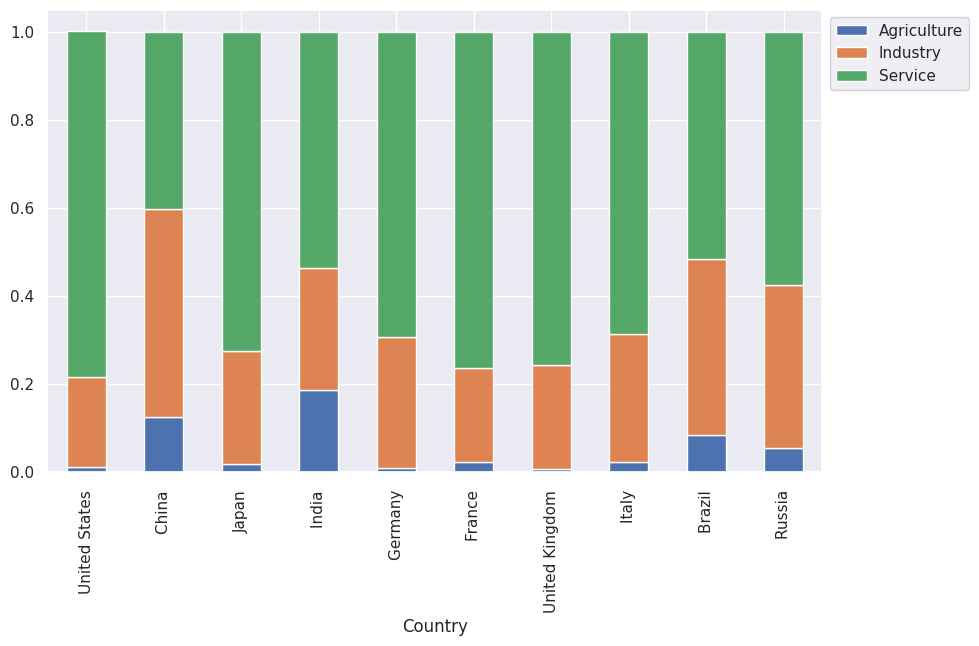

In [ ]:
plot_data = top_gdp_countries.head(10)[['Country','Agriculture', 'Industry', 'Service']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

As well as their land usage:

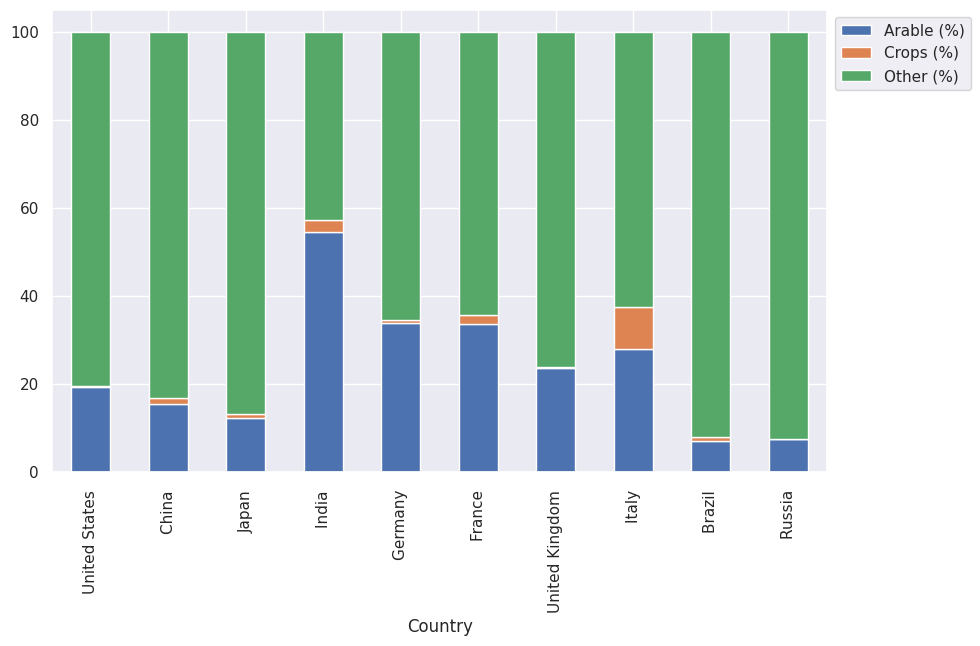

In [ ]:
plot_data = top_gdp_countries[['Country','Arable (%)', 'Crops (%)', 'Other (%)']]
plot_data = plot_data.set_index('Country')
ax = plot_data.plot.bar(stacked=True,figsize=(10,6))
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

<a id='8'>8. References</a>
<ul>
  <li><a href='https://docs.scipy.org/doc/numpy/'>Numpy</a></li>
  <li><a href='https://pandas.pydata.org/'>Pandas</a></li>
  <li><a href='https://matplotlib.org/'>Matplotlib</a></li>
  <li><a href='https://seaborn.pydata.org/'>Seaborn</a></li>
  <li><a href='https://scikit-learn.org'>Scikit-Learn</a></li>
</ul>